<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/DemandaAnalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel('demanda.xls',index_col=0,parse_dates=True)
df.head()

,demanda
fecha,
2020-10-05,85.980000
2020-10-12,87.931746
2020-10-19,81.583074
2020-10-26,74.256914
2020-11-02,84.509645


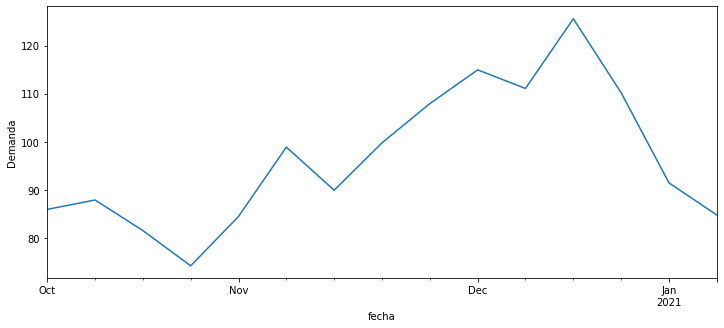

In [ ]:
%matplotlib inline
ax=df['demanda'].plot(figsize=(12,5))
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Demanda');

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
#s_dec_additive=seasonal_decompose(df['demanda'],model='additive')
s_dec_additive=seasonal_decompose(df['demanda'],model='multiplicative')
s_dec_additive.plot()
plt.show()

ValueError: ignored

#Filtro **Hodrick-Prescott**

In [3]:
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.filters.cf_filter import cffilter
estacional,tendencia=hpfilter(df['demanda'],lamb=14400)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df['tendencia']=tendencia

In [5]:
df['estacionalidad']=estacional

In [6]:
df.head()

,demanda,tendencia,estacionalidad
fecha,,,
2020-10-05,85.980000,84.262578,1.717422
2020-10-12,87.931746,86.032508,1.899238
2020-10-19,81.583074,87.802557,-6.219483
2020-10-26,74.256914,89.572977,-15.316063
2020-11-02,84.509645,91.343586,-6.833941


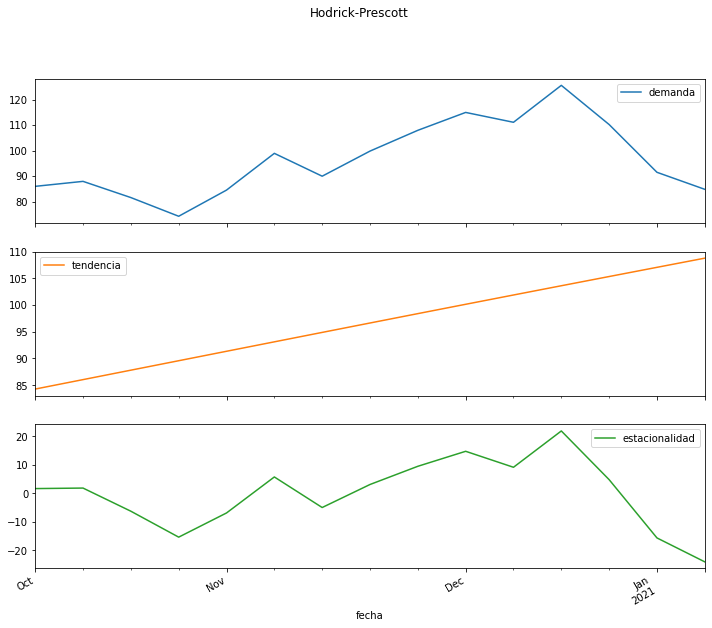

In [7]:
df[['demanda','tendencia','estacionalidad']].plot(
    subplots=True,
    layout=(3,1),
    figsize=(12,10),
    title=('Hodrick-Prescott')
    );

#Filtro **Christiano Fitzgerald**

In [ ]:
estacionalcf,tendenciacf=cffilter(df['demanda'])
df['tendencia_cf']=tendenciacf
df['estacionalidad_cf']=estacionalcf
df.head()

,demanda,tendencia_cf,estacionalidad_cf
fecha,,,
2020-10-05,85.980000,91.830562,-5.850562
2020-10-12,87.931746,96.889202,-8.873970
2020-10-19,81.583074,92.469346,-10.719300
2020-10-26,74.256914,85.146810,-10.639439
2020-11-02,84.509645,93.590456,-8.746867


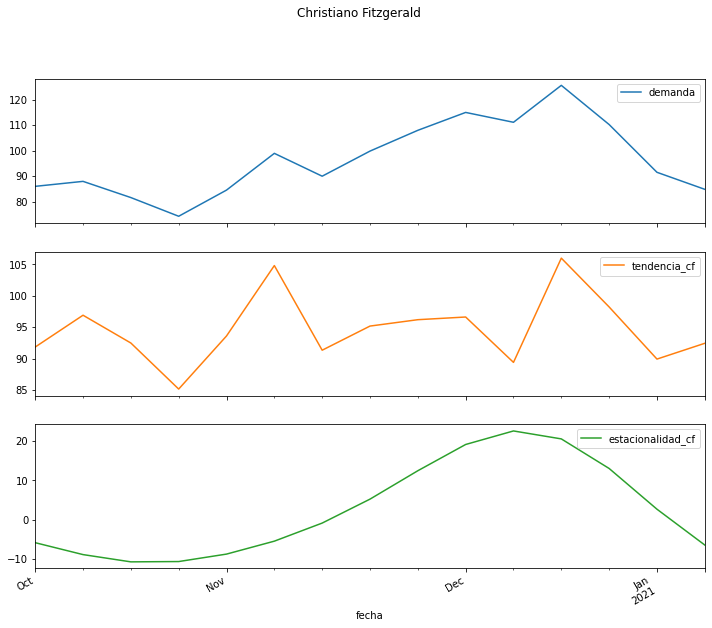

In [ ]:
ax=df[['demanda','tendencia_cf','estacionalidad_cf']].plot(
    subplots=True,
    layout=(3,1),
    figsize=(12,10),
    title=('Christiano Fitzgerald')
    )